<a href="https://colab.research.google.com/github/mett29/DL-Competition/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from getpass import getpass
import os

user = getpass('Github user')
password = getpass('Github password')
os.environ['GITHUB_AUTH'] = user + ':' + password

#!git clone https://$GITHUB_AUTH@github.com/mett29/DL-Competition.git
#!git submodule update --init --recursive
!git clone https://$GITHUB_AUTH@github.com/DanieleParravicini/DL-CompetitionsDatasets
os.environ['GITHUB_AUTH'] = ''

In [0]:
#This permit to let colab work without having to 
#stay online you can let cola save the model by itself when ends
from google.colab import drive
googleDrivePath = 'drive'
drive.mount('/content/'+googleDrivePath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [0]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [0]:
PATH = "DL-CompetitionsDatasets/Classification_Dataset"
#!tree {PATH} -d

In [0]:
SEED = 1234
tf.random.set_seed(SEED) 

In [0]:
apply_data_augmentation = True

# Create training ImageDataGenerator object
if apply_data_augmentation:
    train_data_gen = ImageDataGenerator(rotation_range=10,                   
                                        zoom_range=0.2,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        shear_range=0.2,
                                        horizontal_flip=True,
                                        vertical_flip=False,
                                        fill_mode='nearest',
                                        cval=0,
                                        rescale=1./255,
                                        validation_split=0.2)
else:
    train_data_gen = ImageDataGenerator(rescale=1./255,
                                        fill_mode='reflect',
                                        cval=0,
                                        validation_split=0.2)

# Create test ImageDataGenerator objects
test_data_gen = ImageDataGenerator(rescale=1./255)

In [66]:
batch_size = 64
no_epochs = 10
no_classes = 20

IMG_HEIGHT = 128
IMG_WIDTH = 128

decide_class_indices = True
if decide_class_indices:
    classes = ['airplanes',           # 0
               'bear',                # 1
               'calculator',          # 2
               'computer-monitor',    # 3
               'fireworks',           # 4
               'galaxy',              # 5
               'grand-piano',         # 6
               'kangaroo',            # 7
               'laptop',              # 8
               'lightbulb',           # 9
               'lightning',           # 10
               'mountain-bike',       # 11
               'owl',                 # 12
               'school-bus',          # 13
               'sheet-music',         # 14
               'skyscraper',          # 15
               'sword',               # 16
               't-shirt',             # 17
               'waterfall',           # 18
               'wine-bottle']         # 19
else:
    classes=None

dataset_dir = os.path.join(PATH, 'training')

train_gen = train_data_gen.flow_from_directory(dataset_dir,
                                               batch_size=batch_size,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               classes=classes,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training',
                                               seed=SEED)

# Validation
valid_gen = train_data_gen.flow_from_directory(dataset_dir,
                                               batch_size=batch_size, 
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               classes=classes,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation',
                                               seed=SEED)

Found 1247 images belonging to 20 classes.
Found 307 images belonging to 20 classes.


In [0]:
train_dataset = tf.data.Dataset.from_generator(lambda: train_gen,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([None, IMG_HEIGHT,IMG_WIDTH, 3], [None, no_classes]))

train_dataset = train_dataset
train_dataset.cache();

valid_dataset = tf.data.Dataset.from_generator(lambda: valid_gen, 
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([None,IMG_HEIGHT,IMG_WIDTH, 3], [None, no_classes]))

valid_dataset = valid_dataset

In [68]:
train_gen.class_indices

{'airplanes': 0,
 'bear': 1,
 'calculator': 2,
 'computer-monitor': 3,
 'fireworks': 4,
 'galaxy': 5,
 'grand-piano': 6,
 'kangaroo': 7,
 'laptop': 8,
 'lightbulb': 9,
 'lightning': 10,
 'mountain-bike': 11,
 'owl': 12,
 'school-bus': 13,
 'sheet-music': 14,
 'skyscraper': 15,
 'sword': 16,
 't-shirt': 17,
 'waterfall': 18,
 'wine-bottle': 19}

In [0]:
# This function will plot images in the form of a grid with 1 row and 4 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(15, 15))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

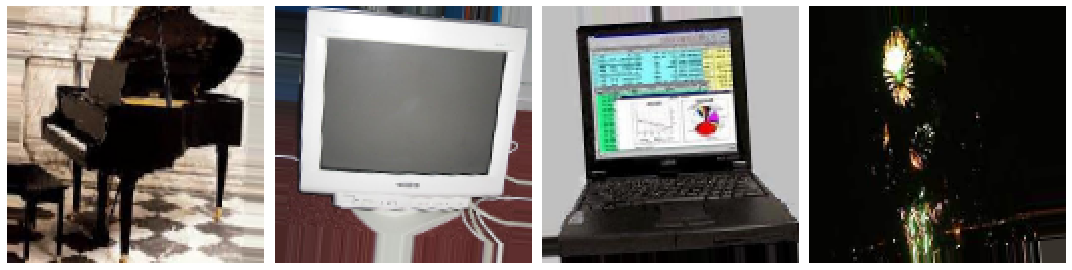

In [70]:
sample_training_images, _ = next(train_gen)
plotImages(sample_training_images[:4])

In [71]:
model = Sequential([
    Conv2D(32, 5, padding='same', activation='relu', input_shape=(None, None, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, 5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, 5, padding='same', activation='relu'),
    Dropout(0.3),
    GlobalMaxPool2D(),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(20, activation='softmax')
], name="GlobalMaxPoolingTentative1" )
#Recall to add a name
print("Model name:",model.name)
model.summary()

Model name: GlobalMaxPoolingTentative1
Model: "GlobalMaxPoolingTentative1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, None, None, 32)    2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 64)    51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, None, 128)   0         
_________________________________________________________________
g

In [0]:
# Optimization parameters
loss = tf.keras.losses.CategoricalCrossentropy()
lr = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Validation metrics
metrics = ['accuracy']

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [125]:
train = True

if(train ):
  history = model.fit(x=train_dataset,
            epochs=no_epochs,
            steps_per_epoch=len(train_gen),
            validation_data=valid_dataset,
            validation_steps=len(valid_gen)
          )
else:
  model_path = 'drive/My Drive/GlobalMaxPoolingTentative120191120-0802'
  model = tf.keras.models.load_model(temp_model_dir+temp_model_name)
  print("Model was overrided by a model load from disk")
  model.summary()
  print('training accuracy', model.evaluate(train_dataset, steps=len(train_gen))[1])
  print('validation accuracy', model.evaluate(valid_dataset, steps=len(train_gen))[1])


Train for 20 steps, validate for 5 steps
Epoch 1/10
20/20 [==============================] - 99s 5s/step - loss: 1.0441 - accuracy: 0.6544 - val_loss: 1.4851 - val_accuracy: 0.5928
Epoch 2/10
20/20 [==============================] - 96s 5s/step - loss: 0.8009 - accuracy: 0.7458 - val_loss: 1.4593 - val_accuracy: 0.6026
Epoch 3/10
 8/20 [===========>..................] - ETA: 54s - loss: 0.8395 - accuracy: 0.7210

KeyboardInterrupt: ignored

In [135]:
# Save the entire model to permit restoration
temp_model_name = model.name + datetime.datetime.now().strftime("%Y%m%d-%H%M")
temp_model_dir = googleDrivePath+"/My Drive/"
model.save( temp_model_dir+temp_model_name)

INFO:tensorflow:Assets written to: drive/My Drive/GlobalMaxPoolingTentative120191120-1755/assets


In [0]:
!tree -d

You should see the model that has been saved here

In [0]:
!ls 'drive/My Drive'

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(no_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

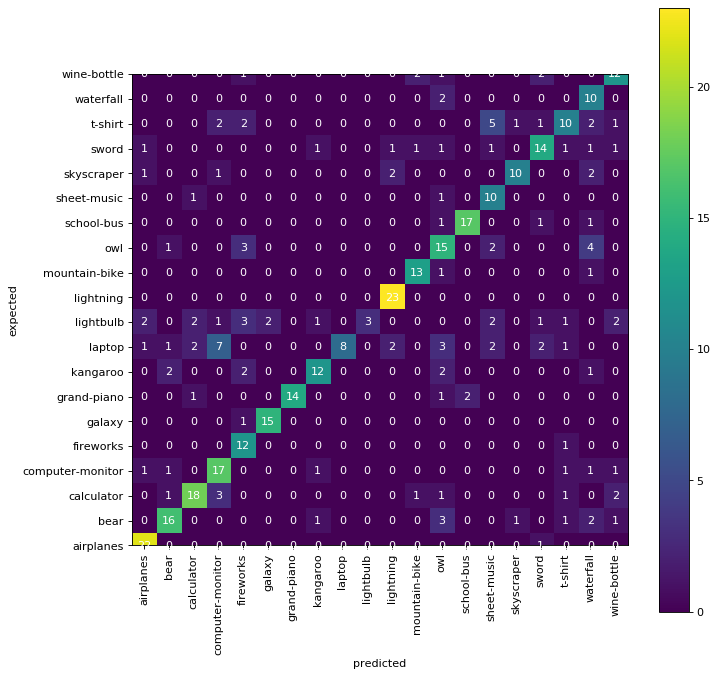

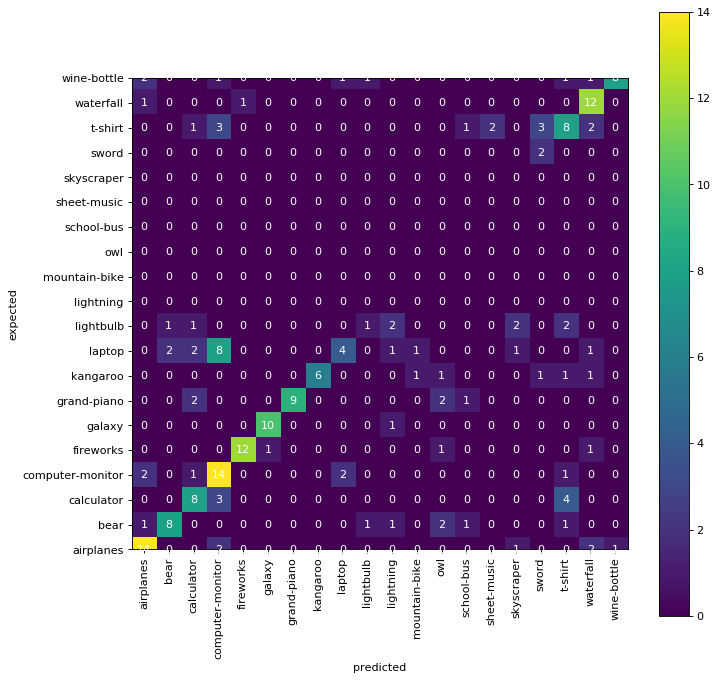

In [124]:

def computeConfusion(dataset, max_num ):
  confusion_matrix = [[ 0 for i in range(0,len(classes))] for i in range(0,len(classes))];

  it = iter(dataset)
  i = 0;
  while( i < max_num):
    batch = next(it)
    images = batch[0]
    labels = batch[1]
    for j,l in enumerate(labels):
      
      if(i > max_num):
        break;

      res = model.predict( tf.expand_dims(images[j], 0))
      expected = np.argmax(l)
      predicted = np.argmax(res);
      '''
      print(l, expected, res, predicted)
      plt.figure()
      plt.subplot(1, 3,1)
      plt.barh(classes,l)
      plt.subplot(1,3,2)
      plt.barh(classes,res[0])
      plt.subplot(1,3,3)
      plt.imshow(images[j])
      plt.show()
      print(expected, predicted)'''
      confusion_matrix[expected][predicted] +=1
      i+=1

  plotConfusionMatrix(confusion_matrix);
      
def plotConfusionMatrix(conf):
  plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
  im = plt.imshow(conf)
  plt.yticks(range(0,20), labels=classes);
  plt.xticks(range(0,20), labels=classes, rotation='vertical' );
  plt.ylabel("expected");
  plt.xlabel("predicted");
  plt.gca().invert_yaxis()
  plt.colorbar();

  for y in range(len(conf)):
      for x in range(len(conf[y])):
          plt.text(x, y , '{:.0f}'.format(conf[y][x]),
                  color='w',horizontalalignment='center',
                  verticalalignment='center')


computeConfusion(train_dataset, 400);
computeConfusion(valid_dataset, 200);



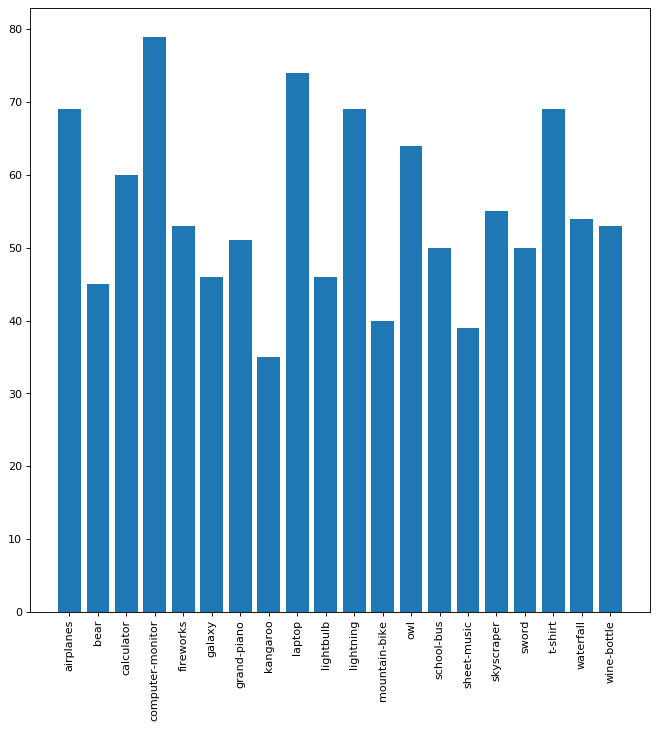

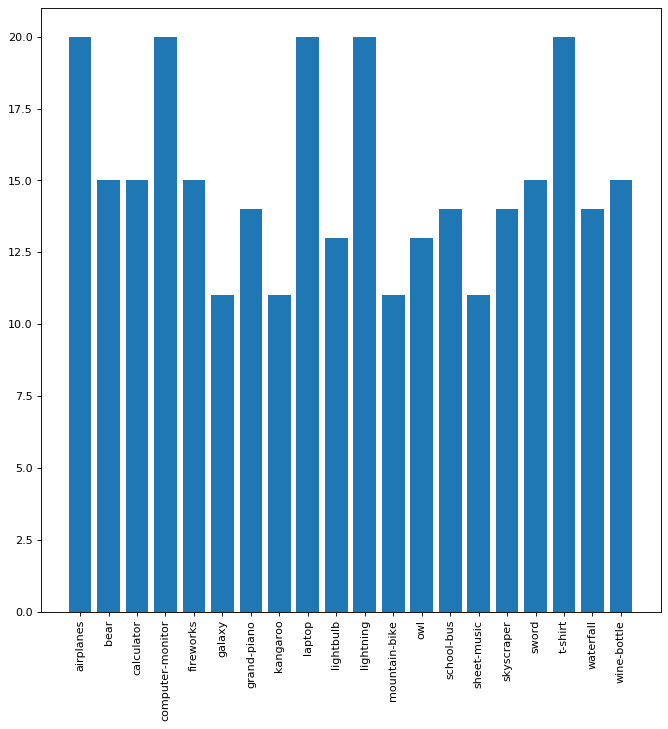

In [134]:
def plotDatasetDistribution(dataset, max_num ):
  classes_count = [0 for i in range(len(classes))]

  it = iter(dataset)
  i = 0;
  while( i < max_num):
    batch = next(it)
    labels = batch[1]
    for l in labels:
      if(i > max_num):
        break
      expected = np.argmax(l)
      classes_count[expected]+=1
      i+=1
  #print(classes_count)
  plt.figure( figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k');
  plt.bar(range(len(classes)), classes_count )
  plt.xticks( ticks=range(len(classes)) ,labels=classes, rotation='vertical' )
  plt.show()

plotDatasetDistribution(train_dataset, 1100)
plotDatasetDistribution(valid_dataset, 300)

  